<a href="https://colab.research.google.com/github/ab1pradhan/Sequence-Modelling-Tensorflow/blob/master/Single_and_Multi_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXFMCNK/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXFMCNK/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXFMCNK/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 62s 158ms/step - loss: 0.5339 - accuracy: 0.7292 - val_loss: 0.4573 - val_accuracy: 0.7979
Epoch 2/10
391/391 [==============================] - 62s 159ms/step - loss: 0.3846 - accuracy: 0.8465 - val_loss: 0.4131 - val_accuracy: 0.8262
Epoch 3/10
391/391 [==============================] - 63s 161ms/step - loss: 0.3215 - accuracy: 0.8701 - val_loss: 0.4615 - val_accuracy: 0.7867
Epoch 4/10
391/391 [==============================] - 62s 159ms/step - loss: 0.3244 - accuracy: 0.8671 - val_loss: 0.4565 - val_accuracy: 0.8085
Epoch 5/10
391/391 [==============================] - 62s 158ms/step - loss: 0.2484 - accuracy: 0.9043 - val_loss: 0.4358 - val_accuracy: 0.8401
Epoch 6/10
391/391 [==============================] - 62s 157ms/step - loss: 0.1915 - accuracy: 0.9303 - val_loss: 0.4660 - val_accuracy: 0.8241
Epoch 7/10
391/391 [==============================] - 61s 157ms/step - loss: 0.1592 - accuracy: 0.9433 - val_loss: 0.5295 - val_ac

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

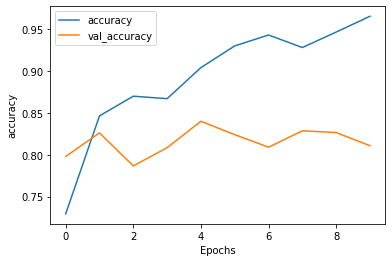

In [11]:
plot_graphs(history, 'accuracy')

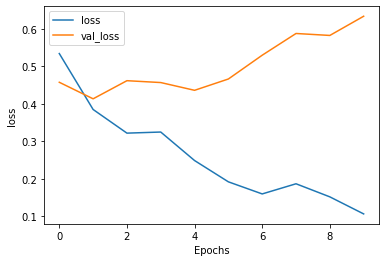

In [12]:
plot_graphs(history, 'loss')

# Multiple Layer LSTM

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [14]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [15]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [16]:
tokenizer = info.features['text'].encoder

In [17]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 108s 276ms/step - loss: 0.5445 - accuracy: 0.7197 - val_loss: 0.5642 - val_accuracy: 0.7157
Epoch 2/10
391/391 [==============================] - 109s 278ms/step - loss: 0.3752 - accuracy: 0.8448 - val_loss: 0.4348 - val_accuracy: 0.8366
Epoch 3/10
391/391 [==============================] - 107s 275ms/step - loss: 0.4165 - accuracy: 0.8174 - val_loss: 0.5578 - val_accuracy: 0.7220
Epoch 4/10
391/391 [==============================] - 108s 276ms/step - loss: 0.3404 - accuracy: 0.8576 - val_loss: 0.4327 - val_accuracy: 0.8188
Epoch 5/10
391/391 [==============================] - 108s 277ms/step - loss: 0.2665 - accuracy: 0.8960 - val_loss: 0.4385 - val_accuracy: 0.8198
Epoch 6/10
391/391 [==============================] - 107s 275ms/step - loss: 0.1927 - accuracy: 0.9314 - val_loss: 0.4810 - val_accuracy: 0.8172
Epoch 7/10
391/391 [==============================] - 108s 277ms/step - loss: 0.1966 - accuracy: 0.9273 - val_loss: 0.5574 -

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

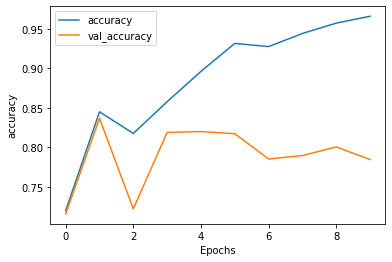

In [23]:
plot_graphs(history, 'accuracy')

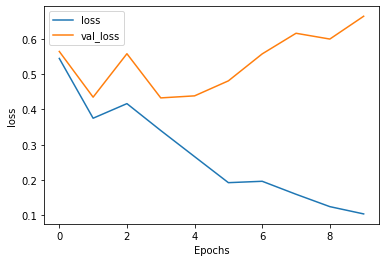

In [24]:
plot_graphs(history, 'loss')